In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as image

In [2]:
def read_data(filename):
    data = scipy.io.loadmat(filename, squeeze_me=True)
    return {k: v for k, v in data.items() if hasattr(v, 'shape')}


def merge_dicts(list_of_dicts):
    keys = list_of_dicts[0].keys()
    return {k: np.array([_[k] for _ in list_of_dicts]) for k in keys}

In [3]:
data = merge_dicts([read_data(f'CHO/analyze/enzyme/{i}.mat') for i in range(1, 49)])

data_range = (-2.6, 2.4)
bins = np.arange(-2.6, 2.41, 0.05)

In [4]:
def get_rc(xyz):
    d1 = np.linalg.norm(xyz[:, :, 5] - xyz[:, :, 7], axis=-1)
    d2 = np.linalg.norm(xyz[:, :, 0] - xyz[:, :, 9], axis=-1)
    return d1 - d2

data['rc'] = get_rc(data['xyz'])

In [5]:
def get_by_rc(rc, values, bins):
    y, x = np.histogram(rc, bins=bins)
    bin_centers = (x[1:] + x[:-1]) / 2
    nbins = len(y)
    bin_width = x[1] - x[0]
    bin_idx = ((rc - x[0]) // bin_width).astype(int)
    mean_by_rc = np.array([np.mean(values[bin_idx == i], axis=0)
                             for i in range(nbins)])
    return bin_centers, mean_by_rc

In [6]:
x, alpha_fixed = get_by_rc(data['rc'], data['atomic_alpha_emle_fixed'], bins)
x, alpha_flexible = get_by_rc(data['rc'], data['atomic_alpha_emle_flexible'], bins)

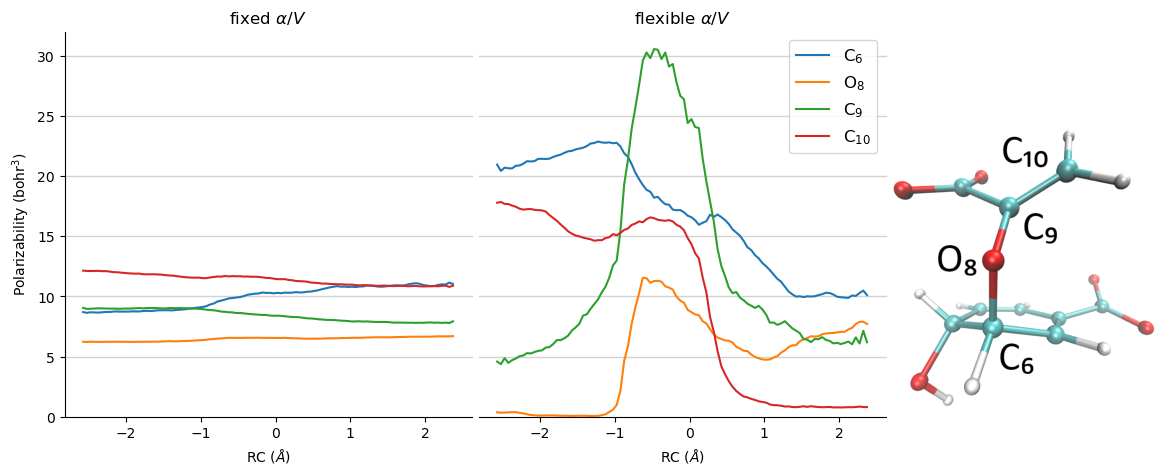

In [7]:
labels = ['C$_6$', 'O$_8$', 'C$_9$', 'C$_{10}$']

fig, axs = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'wspace': 0.02, 'width_ratios': [0.38, 0.38, 0.24]})
axs[1].sharey(axs[0])

for i, atom_alpha in enumerate(alpha_fixed.T[[5, 7, 8, 9,]]):
    axs[0].plot(x, atom_alpha, label=labels[i])

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_title('fixed $\\alpha/V$')
axs[0].set_xlabel('RC ($\AA$)')
axs[0].set_ylabel('Polarizability (bohr$^3$)')
    
for label, atom_alpha in zip(labels, alpha_flexible.T[[5, 7, 8, 9,]]):
    axs[1].plot(x, atom_alpha, label=label)

axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].set_xlabel('RC ($\AA$)')
axs[1].set_title('flexible $\\alpha/V$')

axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_position([0.56,0.05,0.5,0.7])
axs[2].axis('off')
img = image.imread('CHO/S3c.png')
axs[2].imshow(img, aspect='equal')

for ax in axs[:2]:
    ax.set_ylim([0, 32])
    for y in range(5, 31, 5):
        ax.axhline(y=y, color='lightgrey', linewidth=1, zorder=-1, clip_on=False)

plt.savefig('FigS3.png', dpi=300, bbox_inches='tight')
plt.show()